In [74]:
'''
__author__ = 'Alex Cheng'
向前逐步回归
红酒打分
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from math import sqrt

In [75]:
target_url3 = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url3,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
def xattrSelect(x,idxSet):
    # x as matrix(list of list) returns subset containing columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return (xOut) 
    

In [83]:
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label

# 将属性矩阵和标签向量2/3训练，1/3测试
indices = len(df) # len表示df有多少行
df.iloc[:,-1].value_counts() # M:111, R:97
xTrain = np.array(df[df.index % 3 != 0].iloc[:,:-1]) # dataframe转为numpy数组
#yTrain = np.array(df[df.index % 3 != 0].iloc[:,-1])
yTrain = np.array([labels[i] for i in df.index if i%3 !=0])
xTest =  np.array(df[df.index % 3 == 0].iloc[:,:-1])
yTest = np.array([labels[i] for i in df.index if i%3 ==0])

In [84]:
# 一次添加一个属性，从0开始
attributeList = []
index = range(len(xTrain[1])) 
indexSet = set(index) # 总的属性
indexSeq = []
oosError = []

for i in index:
    attSet = set(attributeList) #已有的属性集
    attTrySet = indexSet - attSet # 未用的属性集合
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    # 尝试每一个之前没有用到的属性
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        # 使用attTemp组成训练集和测试集
        xTrainTemp = xattrSelect(xTrain,attTemp)
        xTestTemp = xattrSelect(xTest,attTemp)
        #yTrainTemp = yTrain
        #yTestTemp = yTest
        
        # scikit linear regression
        wineModel = linear_model.LinearRegression()
        wineModel.fit(xTrainTemp,yTrain)
        testPred = wineModel.predict(xTestTemp)
        rmsError = np.linalg.norm((yTest - testPred),2) / sqrt(len(yTest)) # 2阶norm就是平方和再开方
        errorList.append(rmsError)
        attTemp = []
        
    iBest = np.argmin(errorList) # 对应最小错误的属性的位置
    attributeList.append(attTry[iBest]) # 拿到对应的属性编号
    oosError.append(errorList[iBest]) # 每种数量属性组合的最小值
 
print(oosError)
print("\n",attributeList)
namesList = [df.columns[i] for i in attributeList]
print("\n",namesList)
    
     
#for i in index:

[0.7234259255116278, 0.6860993152837196, 0.6734365033420278, 0.6677033213897796, 0.6622558568522273, 0.6590004754154626, 0.6572717206143076, 0.6570905806207697, 0.656999309644614, 0.6575818940043472, 0.6573909869011337]

 [10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

 ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'total sulfur dioxide', 'pH', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'density', 'fixed acidity']


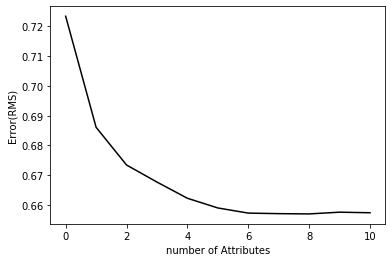

In [85]:
# plot error vs number of attributes
x = range(len(oosError))
plt.plot(x,oosError,'k')
plt.xlabel('number of Attributes')
plt.ylabel('Error(RMS)')
plt.show()

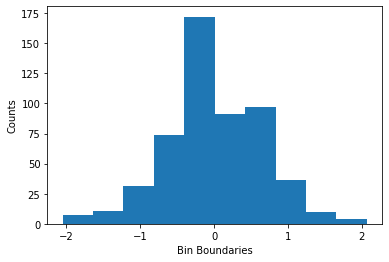

In [86]:
# histogram of out-sample errors for best number of attributes
indexBest = oosError.index(min(oosError)) # list最小值对应索引位置
attributeBest = attributeList[:(indexBest + 1)]

#  定义column-wise 子集 
xTrainTemp = xattrSelect(xTrain,attributeBest)
xTestTemp = xattrSelect(xTest,attributeBest)
# train and plot error histogram
wineModel = linear_model.LinearRegression()
wineModel.fit(xTrainTemp,yTrain)
errorVector = yTest - wineModel.predict(xTestTemp) #错误分布 hisogram直方图
#print(errorVector)
plt.hist(errorVector) # 错误分布直方图
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

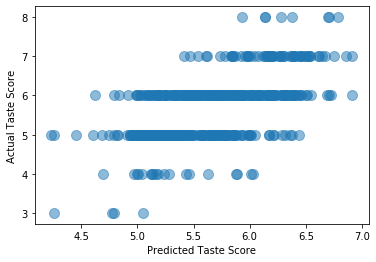

In [87]:
# scatter plot of actucl vs predicted
plt.scatter(wineModel.predict(xTestTemp),yTest,s=100,alpha=0.5) # size散点大小
plt.xlabel("Predicted Taste Score")
plt.ylabel("Actual Taste Score")
plt.show()

In [88]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')